In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
file_path = "/kaggle/input/fullsetn/FullDataset - Copie.xlsx"
xls = pd.ExcelFile(file_path)
print(xls.sheet_names)

['ValManq', 'Tableau1', '2023_1', '2023_2']


In [18]:
df = pd.read_excel(file_path,sheet_name='2023_2')
df.head()

,ID client,EMC_2020,EMC_2021,EMC_2022,Evolution_EM_2021vs2020,Evolution_EM_2022vs2021,ZeroStreak_2020,ZeroStreak_2021,ZeroStreak_2022,Delta_EM_2020,...,moyenne_connexions_2022,top_canal_2022,nb_top_canal_2022,tendance_connexions_2022,plus_actif_que_moyenne_2022,type_utilisateur_2022,Mouvements_Cumulés_Créditeurs_à_M_(Dh)_2022,Mouvements_Cumulés_Débiteurs_à_M_(Dh)_2022,Solde_à_M_(Dh)_2022,Solde_négatif_2022
0,1,5.195431e+03,5.190141e+03,6.123909e+03,-0.101822,17.991178,0,0,0,3776.7744,...,0.0,SANS CANAL,0,inconnue,False,occasionnel,52003.00,59532.13,2532.32,False
1,2,6.144167e+03,1.122189e+04,2.206286e+03,82.643058,-80.339450,0,0,0,-1510.0953,...,94.0,MBK,94,en hausse,False,occasionnel,18753.00,26026.77,671.65,False
2,3,1.323133e+05,1.319292e+05,1.315489e+05,-0.290316,-0.288237,0,0,0,-349.1516,...,0.0,SANS CANAL,0,inconnue,False,occasionnel,0.00,371.07,129675.00,False
3,4,1.220724e+06,1.955356e+06,2.108484e+06,60.180032,7.831186,0,0,0,549170.4463,...,407.5,MBK,813,en hausse,True,digital intensif,6481987.75,8459450.37,942287.71,False
4,5,8.007897e+04,1.057855e+05,5.328427e+04,32.101520,-49.629914,0,0,0,44674.3808,...,23.0,EBK,23,en hausse,False,occasionnel,170016.56,275094.54,434.91,False


In [5]:
#!pip install -U scikit-learn imbalanced-learn

In [4]:
pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 83.5 MB/s eta 0:00:00:00:01:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
bigframes 1.36.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install --upgrade imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
import imblearn
import sklearn

print(f"scikit-learn version :{sklearn.__version__}")
print(f"imbalanced-learn version :{imblearn.__version__}")

scikit-learn version :1.6.1
imbalanced-learn version :0.13.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26182 entries, 0 to 26181
Data columns (total 72 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ID client                                    26182 non-null  int64  
 1   EMC_2020                                     26182 non-null  float64
 2   EMC_2021                                     26182 non-null  float64
 3   EMC_2022                                     26182 non-null  float64
 4   Evolution_EM_2021vs2020                      26182 non-null  float64
 5   Evolution_EM_2022vs2021                      26182 non-null  float64
 6   ZeroStreak_2020                              26182 non-null  int64  
 7   ZeroStreak_2021                              26182 non-null  int64  
 8   ZeroStreak_2022                              26182 non-null  int64  
 9   Delta_EM_2020                                26182 non-null  float64
 10

In [19]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
 
def preprocess_categoricals(df, target_col=None):
    df = df.copy()

    mappings = {
        "catégorie_âge": {
            '<18': 0, '18-25': 1, '25-30': 2, '30-45': 3, '45-60': 4, '60-80': 5, '80>': 6, 'Non Identifié': -1
        },
        "type_utilisateur_2022": {
            'occasionnel': 0, 'digital modéré': 1, 'digital intensif': 2
        },
        "tendance_connexions_2022": {
            'inconnue': 0, 'en hausse': 1
        },
        "cat_ratio_ops_vers_autre_banque_2021": {
            'aucune': 0, 'faible': 1, 'modéré': 2, 'élevé': 3
        },
        "cat_ratio_ops_vers_autre_banque_2022": {
            'aucune': 0, 'faible': 1, 'modéré': 2, 'élevé': 3
        }
    }
 
    for col, mapping in mappings.items():
        if col in df.columns:
            df[col] = df[col].map(mapping)
 
    onehot_cols = [
        "Categorie_Volatilite_2020",
        "Categorie_Volatilite_2021",
        "Categorie_Volatilite_2022",
        "Ligne Métier_x",
        "Niveau_Service_Regroupe",
        "top_canal_2022"
        #"Statut",
        #"Type Personne"
    ]
    onehot_cols = [col for col in onehot_cols if col in df.columns]
 
    # OneHotEncoding with drop='first' to avoid multicollinearity
    df = pd.get_dummies(df, columns=onehot_cols, drop_first=False)
 
    # === Frequency encoding for high-cardinality columns ===
    """
    high_card_cols = [
        "top_famille_opération_2021", "top_type_opération_2021",
        "CSP_x", "Pays Client", "Région"
    ]
    
    for col in high_card_cols:
        if col in df.columns:
            freqs = df[col].value_counts(normalize=True)
            df[col + "_freq"] = df[col].map(freqs)
            df.drop(columns=[col], inplace=True)
     """
    return df
    

df_encoded = preprocess_categoricals(df, target_col='Attrition_2023')

In [46]:
df_num = df_encoded.select_dtypes(include=['int64','float64'])
corr_matrix = df_num.corr()
print('succes')

succes


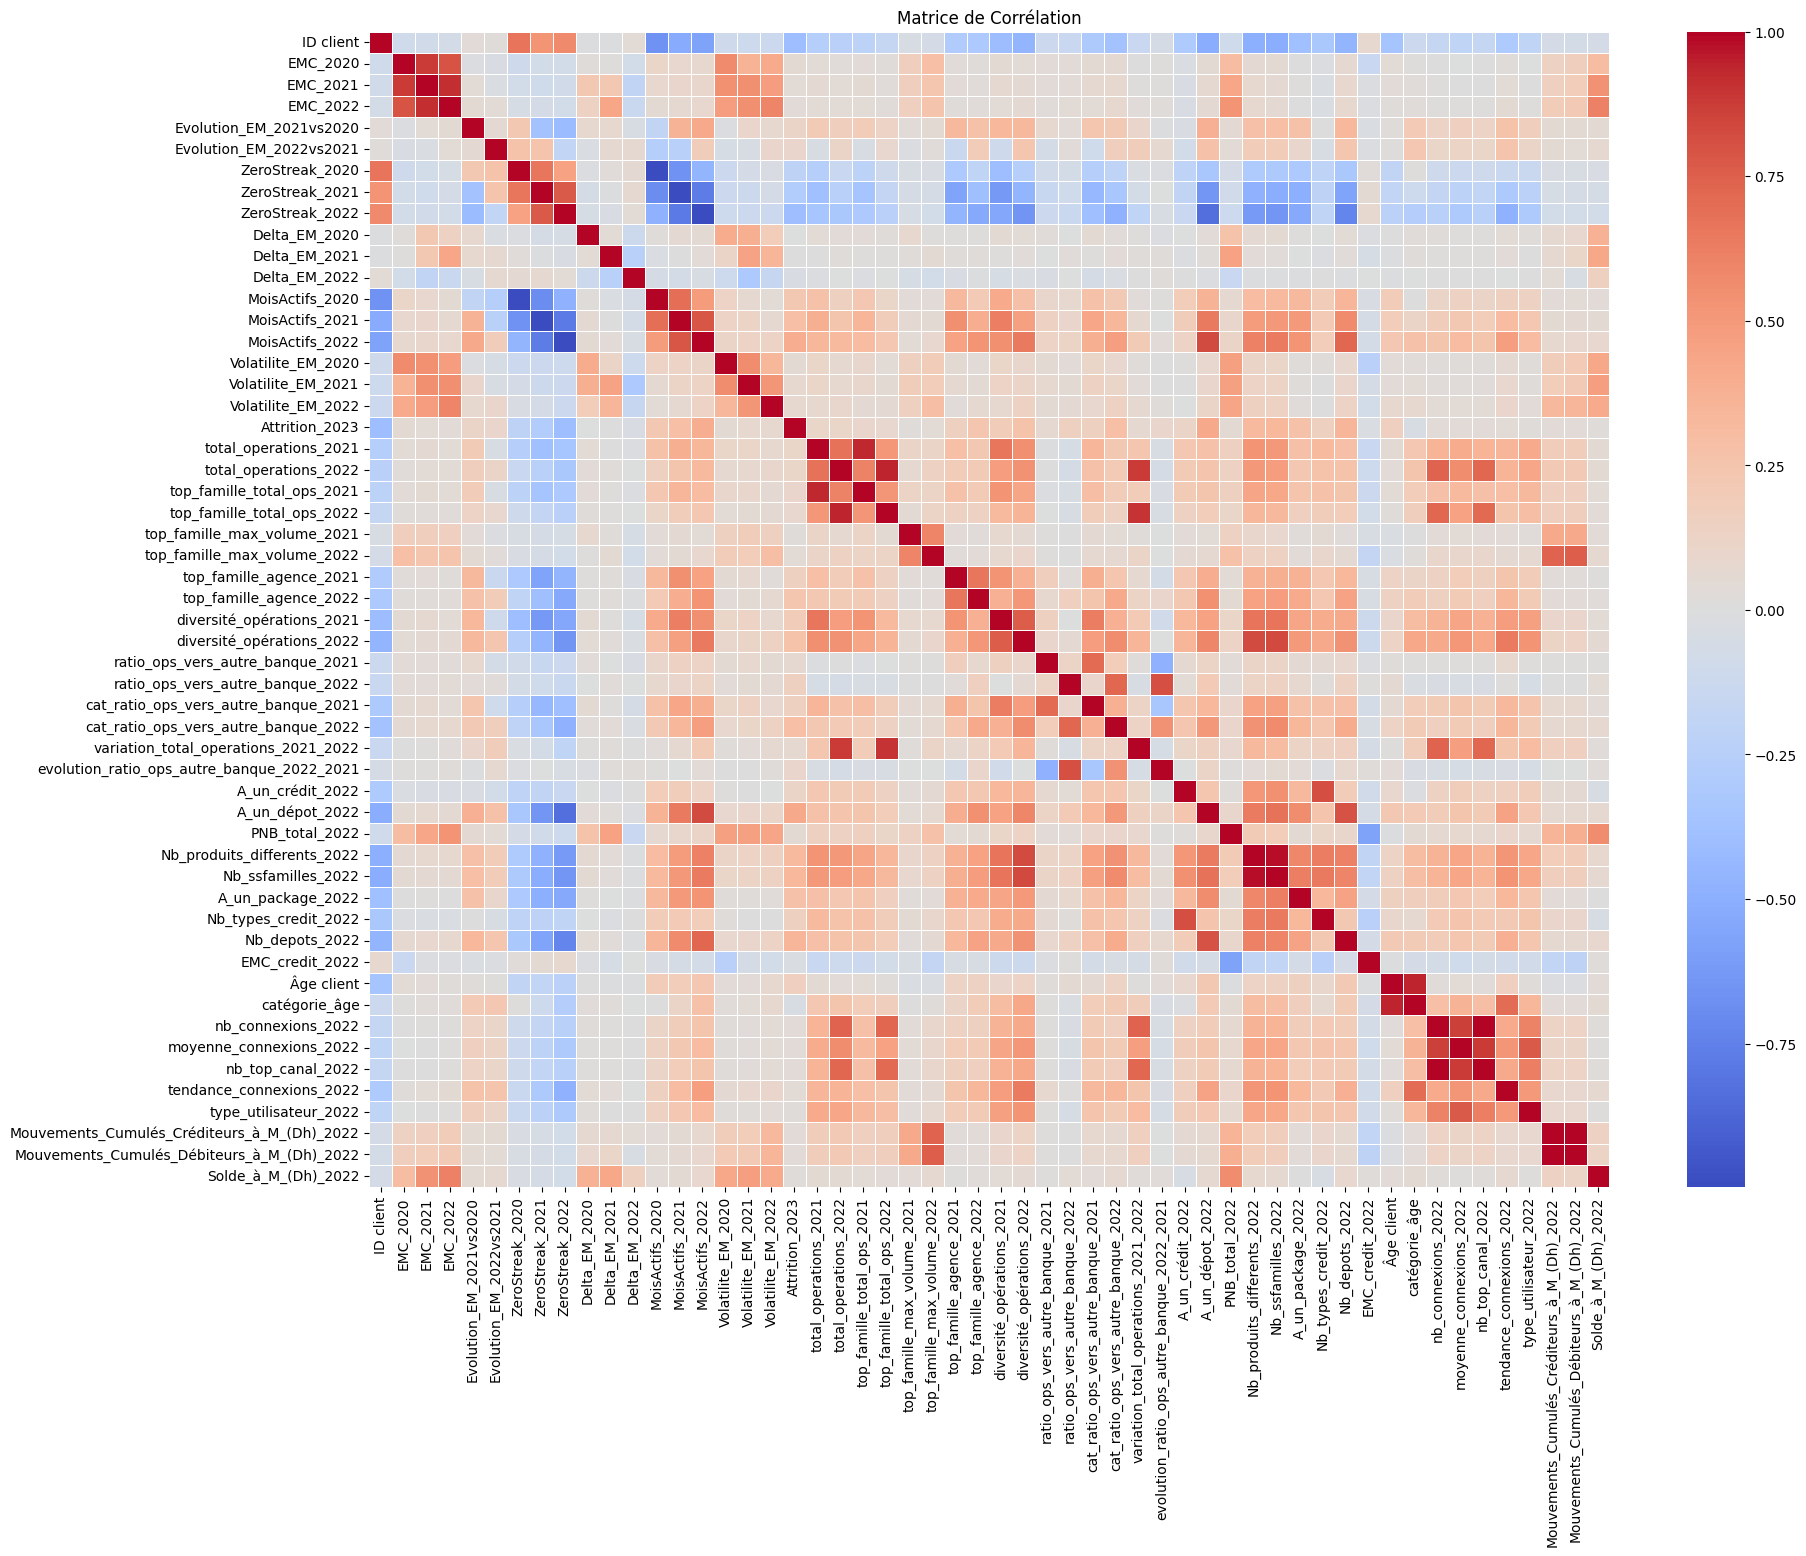

In [47]:
plt.figure(figsize=(20, 15))
sn.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()

In [48]:
# Corrélations absolues supérieures à 0.8 (sauf diagonale)
threshold = 0.8
high_corr = corr_matrix.abs().unstack().sort_values(ascending=False)
high_corr = high_corr[high_corr < 1]  # Exclut la diagonale
high_corr = high_corr[high_corr > threshold]
print(high_corr)

nb_top_canal_2022                            nb_connexions_2022                             0.998130
nb_connexions_2022                           nb_top_canal_2022                              0.998130
ZeroStreak_2022                              MoisActifs_2022                                0.996973
MoisActifs_2022                              ZeroStreak_2022                                0.996973
MoisActifs_2021                              ZeroStreak_2021                                0.996507
ZeroStreak_2021                              MoisActifs_2021                                0.996507
Mouvements_Cumulés_Créditeurs_à_M_(Dh)_2022  Mouvements_Cumulés_Débiteurs_à_M_(Dh)_2022     0.993894
Mouvements_Cumulés_Débiteurs_à_M_(Dh)_2022   Mouvements_Cumulés_Créditeurs_à_M_(Dh)_2022    0.993894
MoisActifs_2020                              ZeroStreak_2020                                0.991097
ZeroStreak_2020                              MoisActifs_2020                               

In [49]:
# Calcul de la matrice de corrélation absolue
corr_matrix = corr_matrix.abs()
 
# Masquer la diagonale (corrélation d'une variable avec elle-même)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
 
# Identifier les colonnes à supprimer : celles ayant une corrélation > seuil
threshold = 0.85
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
 
# Affichage des colonnes à supprimer
print("Colonnes supprimées en raison d'une forte corrélation (> 0.85) :")
print(to_drop)
 
# Suppression des colonnes
df_reduced = df_encoded.drop(columns=to_drop)

Colonnes supprimées en raison d'une forte corrélation (> 0.85) :
['EMC_2021', 'EMC_2022', 'MoisActifs_2020', 'MoisActifs_2021', 'MoisActifs_2022', 'top_famille_total_ops_2021', 'top_famille_total_ops_2022', 'variation_total_operations_2021_2022', 'Nb_ssfamilles_2022', 'catégorie_âge', 'moyenne_connexions_2022', 'nb_top_canal_2022', 'Mouvements_Cumulés_Débiteurs_à_M_(Dh)_2022']


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [57]:
from sklearn.model_selection import train_test_split 
# === 3. Séparer les features et la cible ===
X = df_encoded.drop(columns=['ID client','Attrition_2023','CSP_x','Pays Client','Région',
                             'EMC_2021', 'EMC_2020', 'MoisActifs_2020', 'MoisActifs_2021',
                             'Mouvements_Cumulés_Débiteurs_à_M_(Dh)_2022',
                             'top_famille_total_ops_2022', 'variation_total_operations_2021_2022', 'Nb_ssfamilles_2022',
                             'Âge client','top_famille_opération_2021','top_famille_opération_2022','nb_top_canal_2022',
                            'top_type_opération_2021','top_type_opération_2022','top_famille_agence_2021',
                            'top_famille_agence_2022'])
#X = df_encoded.drop(columns=['ID client','Attrition_2023','Nb_ssfamilles_2022','MoisActifs_2021',
                            # 'Âge client','MoisActifs_2022','Mouvements_Cumulés_Débiteurs_à_M_(Dh)_2022'])
y = df_encoded['Attrition_2023']

In [58]:
# === 4. Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('success')

success


In [59]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26182 entries, 0 to 26181
Data columns (total 66 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   EMC_2022                                                26182 non-null  float64
 1   Evolution_EM_2021vs2020                                 26182 non-null  float64
 2   Evolution_EM_2022vs2021                                 26182 non-null  float64
 3   ZeroStreak_2020                                         26182 non-null  int64  
 4   ZeroStreak_2021                                         26182 non-null  int64  
 5   ZeroStreak_2022                                         26182 non-null  int64  
 6   Delta_EM_2020                                           26182 non-null  float64
 7   Delta_EM_2021                                           26182 non-null  float64
 8   Delta_EM_2022                       

<h2>Random Forest</h2>

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
 
# === 5. Feature selection avec RandomForest ===
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [61]:
from sklearn.feature_selection import SelectFromModel
# Sélection des variables importantes
selector = SelectFromModel(rf, prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


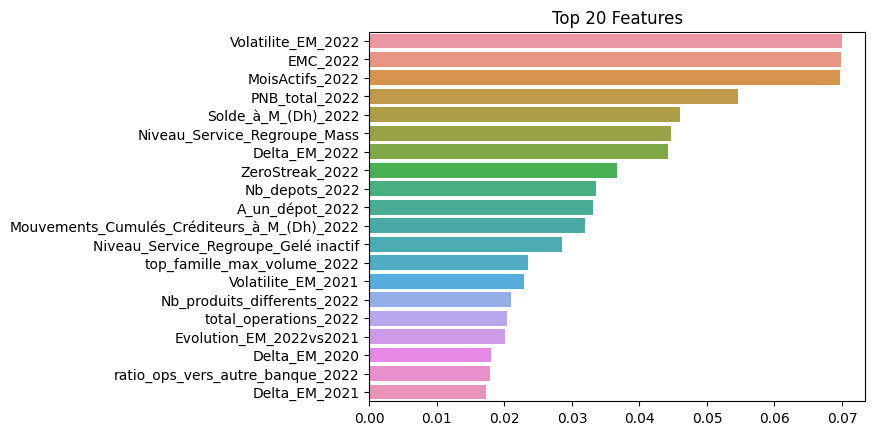

In [62]:
importances = rf.feature_importances_
feature_names = X_train.columns
feat_imp = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)
 
# Affichage
sn.barplot(x=[f[1] for f in feat_imp[:20]], y=[f[0] for f in feat_imp[:20]])
plt.title("Top 20 Features")
plt.show()

In [63]:
# === 6. Entraînement final sur les features sélectionnées ===
rf_final = RandomForestClassifier(n_estimators=200, random_state=42)
rf_final.fit(X_train, y_train)
y_pred = rf_final.predict(X_test)
y_proba = rf_final.predict_proba(X_test)[:, 1]
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Matrice de confusion:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      3860
           1       0.79      0.63      0.70      1377

    accuracy                           0.86      5237
   macro avg       0.83      0.79      0.80      5237
weighted avg       0.85      0.86      0.85      5237

Matrice de confusion:
 [[3634  226]
 [ 511  866]]


In [26]:
# Affichage des variables importantes
selected_features = X_train.columns[selector.get_support()]
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
top_selected = feature_importances[selected_features].sort_values(ascending=False)
 
print("\nTop variables sélectionnées :")
print(top_selected.head(20))


Top variables sélectionnées :
Volatilite_EM_2022                             0.133080
EMC_2022                                       0.120725
PNB_total_2022                                 0.075097
Solde_à_M_(Dh)_2022                            0.073552
ZeroStreak_2022                                0.072174
Delta_EM_2022                                  0.067984
Mouvements_Cumulés_Créditeurs_à_M_(Dh)_2022    0.066268
Nb_produits_differents_2022                    0.043348
Niveau_Service_Regroupe_Mass                   0.042747
Volatilite_EM_2021                             0.039946
Evolution_EM_2022vs2021                        0.037224
Delta_EM_2021                                  0.037185
dtype: float64


SMOTE

In [28]:
from imblearn.over_sampling import SMOTE 
# Appliquer SMOTE uniquement sur le train
smote = SMOTE(random_state=42)
X_res_sm, y_res_sm = smote.fit_resample(X_train_selected, y_train)
 
print(f"Avant SMOTE : {y_train.value_counts().to_dict()}")
print(f"Après SMOTE : {y_res_sm.value_counts().to_dict()}")

Avant SMOTE : {0: 15436, 1: 5509}
Après SMOTE : {0: 15436, 1: 15436}


In [29]:
rf_smote = RandomForestClassifier(random_state=42)
# Entraîner le modèle
rf_smote.fit(X_res_sm, y_res_sm)
 
# Prédictions sur le test
y_pred_smote = rf_smote.predict(X_test_selected)
y_proba_smote = rf_smote.predict_proba(X_test_selected)[:, 1]

print("=== Résultats avec SMOTE ===")
print(classification_report(y_test,y_pred_smote))
print(confusion_matrix(y_test, y_pred_smote))

=== Résultats avec SMOTE ===
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3860
           1       0.72      0.71      0.72      1377

    accuracy                           0.85      5237
   macro avg       0.81      0.81      0.81      5237
weighted avg       0.85      0.85      0.85      5237

[[3475  385]
 [ 395  982]]


Undersampling

In [30]:
from imblearn.under_sampling import RandomUnderSampler

rus= RandomUnderSampler(random_state=42)
X_res_rus, y_res_rus = rus.fit_resample(X_train_selected, y_train)

print(f"Avant RUS : {y_train.value_counts().to_dict()}")
print(f"Après RUS : {y_res_rus.value_counts().to_dict()}")

Avant RUS : {0: 15436, 1: 5509}
Après RUS : {0: 5509, 1: 5509}


In [31]:
rf_rus= RandomForestClassifier(random_state=42)
rf_rus.fit(X_res_rus, y_res_rus)
y_pred_rus = rf_rus.predict(X_test_selected)
y_proba_rus = rf_rus.predict_proba(X_test_selected)[:, 1]

print("=== Résultats avec Undersampling ===")
print(classification_report(y_test,y_pred_rus))
print(confusion_matrix(y_test, y_pred_rus))

=== Résultats avec Undersampling ===
              precision    recall  f1-score   support

           0       0.95      0.79      0.86      3860
           1       0.60      0.89      0.71      1377

    accuracy                           0.81      5237
   macro avg       0.77      0.84      0.79      5237
weighted avg       0.86      0.81      0.82      5237

[[3039  821]
 [ 156 1221]]


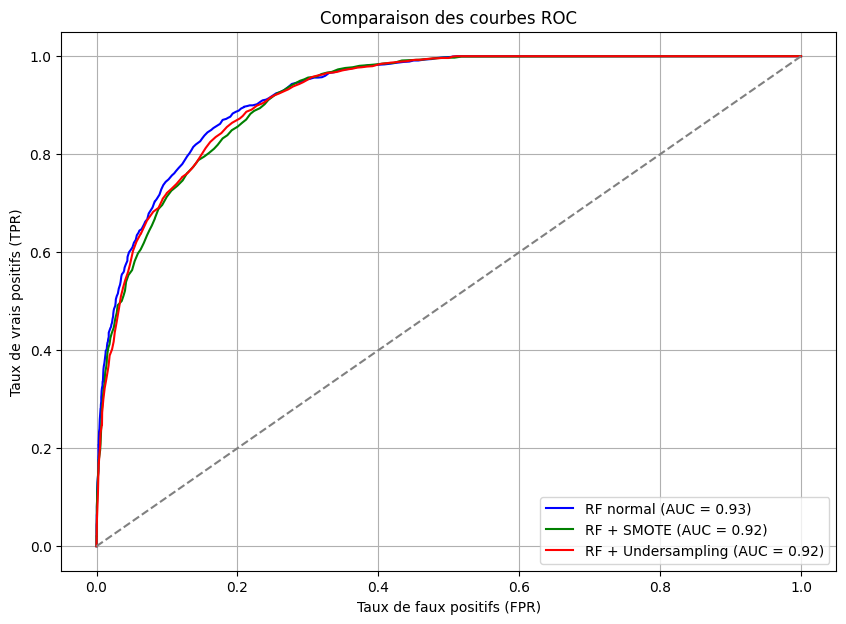

In [32]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba)
fpr_smote, tpr_smote, _ = roc_curve(y_test, y_proba_smote)
fpr_under, tpr_under, _ = roc_curve(y_test, y_proba_rus)

auc_rf = roc_auc_score(y_test, y_proba)
auc_smote = roc_auc_score(y_test, y_proba_smote)
auc_under = roc_auc_score(y_test, y_proba_rus)

plt.figure(figsize=(10, 7))
plt.plot(fpr_rf, tpr_rf, label=f"RF normal (AUC = {auc_rf:.2f})", color='blue')
plt.plot(fpr_smote, tpr_smote, label=f"RF + SMOTE (AUC = {auc_smote:.2f})", color='green')
plt.plot(fpr_under, tpr_under, label=f"RF + Undersampling (AUC = {auc_under:.2f})", color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Comparaison des courbes ROC")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

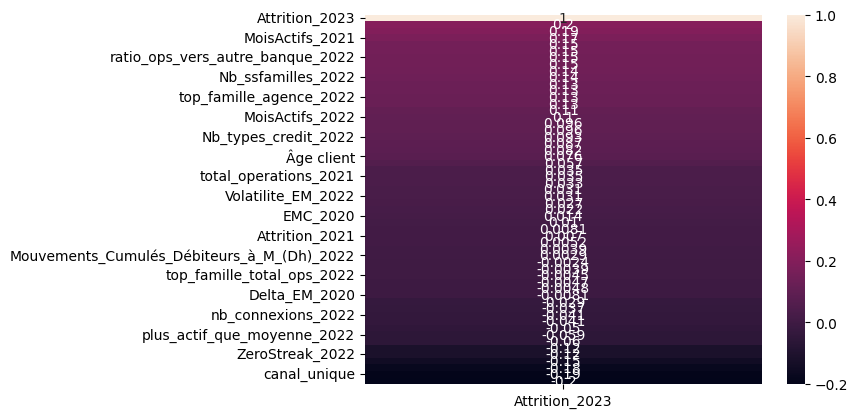

In [24]:
df_corr = df.corr(numeric_only=True)
sn.heatmap(df_corr[['Attrition_2023']].sort_values(by='Attrition_2023',ascending=False), annot=True)
plt.show

<h2>XGBoost</h2>

In [33]:
pip install --upgrade xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 6.3 MB/s eta 0:00:000:00:0100:01
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.0.3
    Uninstalling xgboost-2.0.3:
      Successfully uninstalled xgboost-2.0.3
Note: you may need to restart the kernel to use updated packages.


In [35]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Calculer le poids de la classe minoritaire
# poids = nombre de classe majoritaire / nombre de classe minoritaire
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

xgb_model_perf = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model_perf.fit(X_train, y_train)
selector = SelectFromModel(xgb_model_perf,threshold='median', prefit=True)
X_train_s = selector.transform(X_train)
X_test_s = selector.transform(X_test)



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [08:22:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [38]:
# Modèle XGBoost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
 
# Entraîner le modèle
xgb_model.fit(X_train_s, y_train)
 
# Prédiction
y_pred_xgb = xgb_model.predict(X_test_s)
y_proba_std = xgb_model.predict_proba(X_test_s)[:, 1]
 
# Évaluation
print("=== Résultats XGBoost ===")
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [08:23:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== Résultats XGBoost ===
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      3860
           1       0.76      0.66      0.71      1377

    accuracy                           0.86      5237
   macro avg       0.82      0.79      0.81      5237
weighted avg       0.85      0.86      0.85      5237

[[3575  285]
 [ 466  911]]


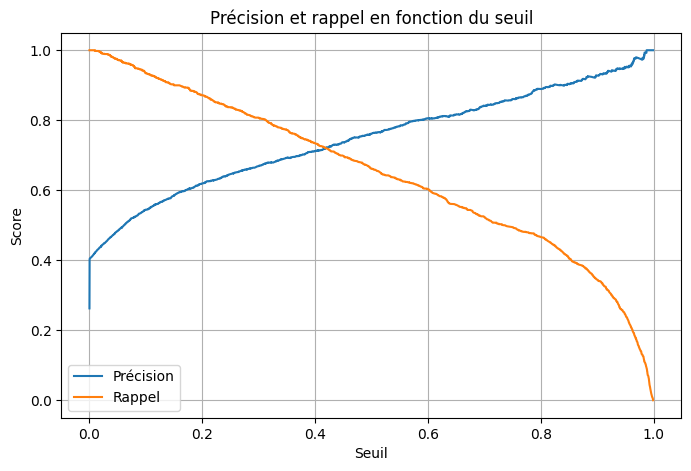

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
# Tracer la courbe précision - rappel
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba_std)
 
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions[:-1], label='Précision')
plt.plot(thresholds, recalls[:-1], label='Rappel')
plt.xlabel('Seuil')
plt.ylabel('Score')
plt.title('Précision et rappel en fonction du seuil')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
# Choisir un seuil manuellement (par exemple, 0.6)
threshold = 0.42
y_pred_thresh = (y_proba_std >= threshold).astype(int)
 
# Afficher les résultats
print("=== Évaluation avec seuil =", threshold, "===")
print(classification_report(y_test, y_pred_thresh))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_thresh))

=== Évaluation avec seuil = 0.42 ===
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3860
           1       0.72      0.72      0.72      1377

    accuracy                           0.85      5237
   macro avg       0.81      0.81      0.81      5237
weighted avg       0.85      0.85      0.85      5237

Matrice de confusion :
 [[3479  381]
 [ 387  990]]


Avec SMOTE

In [44]:
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

xgb_smote = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Entraîner le modèle
xgb_smote.fit(X_train_sm, y_train_sm)
 
# Prédiction
y_pred_xgb_sm = xgb_smote.predict(X_test)
y_proba_smote = xgb_smote.predict_proba(X_test)[:, 1]
 
# Évaluation
print("=== Résultats XGBoost SMOTE ===")
print(classification_report(y_test, y_pred_xgb_sm))
print(confusion_matrix(y_test, y_pred_xgb_sm))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [08:25:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== Résultats XGBoost SMOTE ===
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      3860
           1       0.74      0.69      0.71      1377

    accuracy                           0.86      5237
   macro avg       0.82      0.80      0.81      5237
weighted avg       0.85      0.86      0.85      5237

[[3532  328]
 [ 431  946]]


Undersampling

In [29]:
rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

xgb_under = XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss', random_state=42)
# Entraîner le modèle
xgb_under.fit(X_train_under, y_train_under)
 
# Prédiction
y_pred_xgb_rus = xgb_under.predict(X_test)
y_proba_under = xgb_under.predict_proba(X_test)[:, 1]
 
# Évaluation
print("=== Résultats XGBoost Undersampling ===")
print(classification_report(y_test, y_pred_xgb_rus))
print(confusion_matrix(y_test, y_pred_xgb_rus))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [12:18:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== Résultats XGBoost Undersampling ===
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      4261
           1       0.54      0.92      0.68       976

    accuracy                           0.84      5237
   macro avg       0.76      0.87      0.79      5237
weighted avg       0.90      0.84      0.85      5237

[[3492  769]
 [  76  900]]


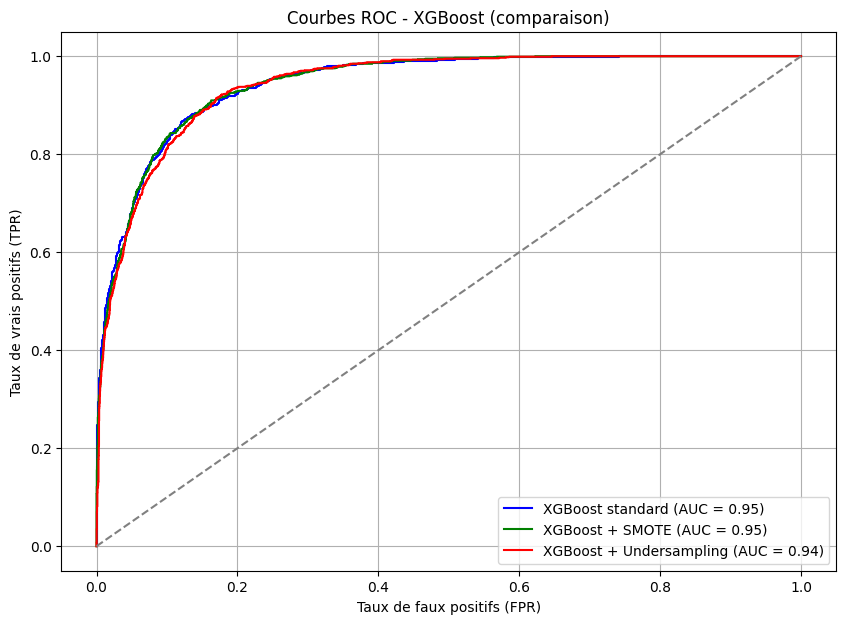

In [30]:
fpr_std, tpr_std, _ = roc_curve(y_test, y_proba_std)
fpr_smote, tpr_smote, _ = roc_curve(y_test, y_proba_smote)
fpr_under, tpr_under, _ = roc_curve(y_test, y_proba_under)

auc_std = roc_auc_score(y_test, y_proba_std)
auc_smote = roc_auc_score(y_test, y_proba_smote)
auc_under = roc_auc_score(y_test, y_proba_under)

# Affichage
plt.figure(figsize=(10, 7))
plt.plot(fpr_std, tpr_std, label=f"XGBoost standard (AUC = {auc_std:.2f})", color='blue')
plt.plot(fpr_smote, tpr_smote, label=f"XGBoost + SMOTE (AUC = {auc_smote:.2f})", color='green')
plt.plot(fpr_under, tpr_under, label=f"XGBoost + Undersampling (AUC = {auc_under:.2f})", color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbes ROC - XGBoost (comparaison)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

<h2>Regression Logistique</h2>

In [45]:
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model_log.fit(X_train, y_train)

y_pred_log = model_log.predict(X_test)
y_proba_log = model_log.predict_proba(X_test)[:, 1]
 
# Évaluation
print("=== Résultats Regression Log ===")
print(classification_report(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))

=== Résultats Regression Log ===
              precision    recall  f1-score   support

           0       0.92      0.57      0.70      3860
           1       0.42      0.87      0.56      1377

    accuracy                           0.65      5237
   macro avg       0.67      0.72      0.63      5237
weighted avg       0.79      0.65      0.67      5237

[[2189 1671]
 [ 179 1198]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
rus_log = RandomUnderSampler(random_state=42)
X_train_und, y_train_und = rus_log.fit_resample(X_train, y_train)

log_under = LogisticRegression(max_iter=1000, class_weight='balanced')
# Entraîner le modèle
log_under.fit(X_train_und, y_train_und)
 
# Prédiction
y_pred_log_rus = log_under.predict(X_test)
y_proba_und = log_under.predict_proba(X_test)[:, 1]
 
# Évaluation
print("=== Résultats Reg Log ===")
print(classification_report(y_test, y_pred_log_rus))
print(confusion_matrix(y_test, y_pred_log_rus))

=== Résultats Reg Log ===
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      4261
           1       0.36      0.70      0.47       976

    accuracy                           0.71      5237
   macro avg       0.64      0.71      0.64      5237
weighted avg       0.81      0.71      0.74      5237

[[3040 1221]
 [ 292  684]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


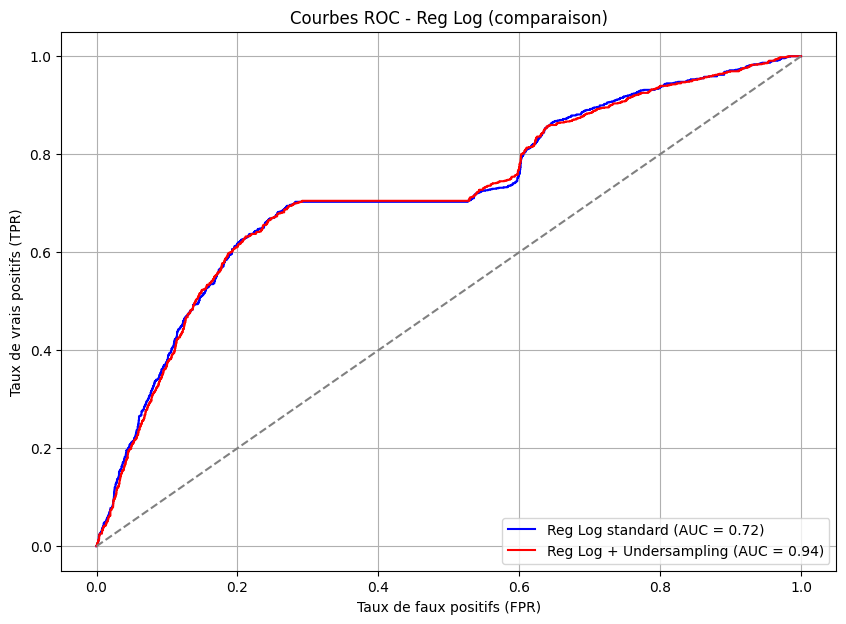

In [33]:
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
fpr_log_under, tpr_log_under, _ = roc_curve(y_test, y_proba_und)

auc_log = roc_auc_score(y_test, y_proba_log)
auc_und = roc_auc_score(y_test, y_proba_und)

# Affichage
plt.figure(figsize=(10, 7))
plt.plot(fpr_log, tpr_log, label=f"Reg Log standard (AUC = {auc_log:.2f})", color='blue')
plt.plot(fpr_log_under, tpr_log_under, label=f"Reg Log + Undersampling (AUC = {auc_under:.2f})", color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbes ROC - Reg Log (comparaison)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()